# 1. Import Dataset

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
path = r'/Users/Luca2/Documents/Dropbox/Mein Mac (Air-von-Luca.fritz.box)/Desktop/Instacart Basket Analysis'

In [5]:
orders_products_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))

# 2. Security implications

In [6]:
orders_products_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30964564 entries, 0 to 32404854
Data columns (total 32 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   order_id                object        
 1   user_id                 object        
 2   order_number            int8          
 3   orders_day_of_week      int8          
 4   hour_of_day_ordered     int8          
 5   days_since_prior_order  float32       
 6   product_id              object        
 7   add_to_cart_order       int32         
 8   reordered               int8          
 9   product_name            object        
 10  aisle_id                int16         
 11  department_id           object        
 12  prices                  float32       
 13  price_range_loc         object        
 14  busiest_day             object        
 15  busiest_days            object        
 16  busiest_period_of_day   object        
 17  max_order               int8          
 18  

### The first and last name columns have already been dropped from the dataframe.

In [7]:
# Changing the datatype of the 'department_id' column from int to string
orders_products_all['department_id'] = orders_products_all['department_id'].astype(str)

In [8]:
orders_products_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30964564 entries, 0 to 32404854
Data columns (total 32 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   order_id                object        
 1   user_id                 object        
 2   order_number            int8          
 3   orders_day_of_week      int8          
 4   hour_of_day_ordered     int8          
 5   days_since_prior_order  float32       
 6   product_id              object        
 7   add_to_cart_order       int32         
 8   reordered               int8          
 9   product_name            object        
 10  aisle_id                int16         
 11  department_id           object        
 12  prices                  float32       
 13  price_range_loc         object        
 14  busiest_day             object        
 15  busiest_days            object        
 16  busiest_period_of_day   object        
 17  max_order               int8          
 18  

In [9]:
orders_products_all.head()

,order_id,user_id,order_number,orders_day_of_week,hour_of_day_ordered,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,frequency flag,gender,state,age,date_joined,dependants,family_status,income,region,exclusion_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,South,Include
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,South,Include
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,South,Include
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,South,Include
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,South,Include


# 3. Regional Differences

In [10]:
# Create a "Region" function 

result = []

for value in orders_products_all ['state']:
    if value in ('Maine', 'New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey'):
        result.append('Northeast')
    elif value in ('Wisconsin', 'Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri'):
        result.append('Midwest')
    elif value in ('Delaware', 'Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana'):
        result.append('South')
    elif value in ('Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii'):
        result.append('West')
    else:
        result.append('Unknown')

In [11]:
result

['South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 '

In [12]:
# Add new region column

orders_products_all['region'] = result

In [13]:
# Check counts of each value in new 'region' column

orders_products_all['region'].value_counts(dropna = False)

South        10311139
West          7927227
Midwest       7261513
Northeast     5464685
Name: region, dtype: int64

In [14]:
# Check if the column has been added 
orders_products_all.head()

,order_id,user_id,order_number,orders_day_of_week,hour_of_day_ordered,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,frequency flag,gender,state,age,date_joined,dependants,family_status,income,region,exclusion_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,South,Include
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,South,Include
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,South,Include
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,South,Include
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,South,Include


In [15]:
# Check if the values add up with total row numbers 

10791885 + 8292913 + 7597325 +  5722736 

32404859

In [16]:
# Create crosstab for analysis

pivot_region_spending = pd.crosstab(orders_products_all['region'], orders_products_all['spending flag'], dropna = False)

In [17]:
pivot_region_spending

spending flag,High spender,Low spender
region,,
Midwest,148678,7112835
Northeast,103120,5361565
South,199339,10111800
West,152288,7774939


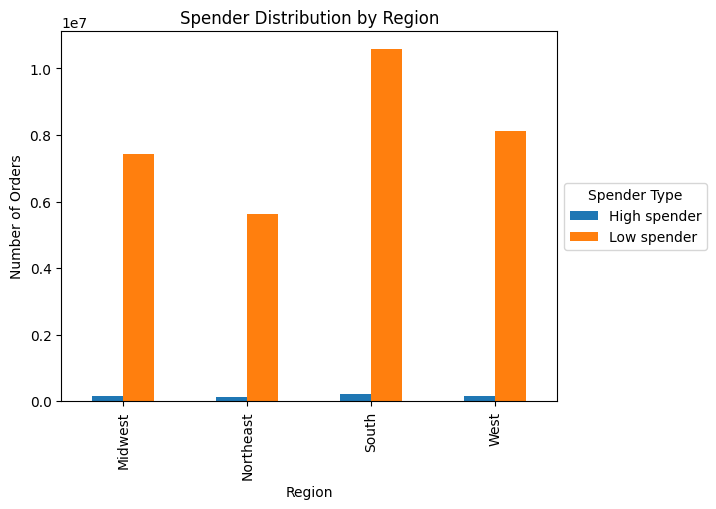

In [30]:
# create a visualization 

bar_region_spender = pivot_region_spending.plot.bar()

bar_region_spender.set(xlabel = 'Region', ylabel = 'Number of Orders', title= 'Spender Distribution by Region')
bar_region_spender.legend (loc= 'center left', bbox_to_anchor=(1,0.5), title = 'Spender Type')

In [31]:
# Export chart
bar_region_spender.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_spender.png'))

#### Findings: There is no difference in spending habits between the different regions. In every region the low spenders are making up the large majority of the orders. I checked the population of the different regions and the number of orders presented here also fits with the population in those. So the region with the most orders is also the region that is the most populated (same for the other regions).

# 4. Exclusion flag

In [18]:
# Create a new column
orders_products_all.loc[orders_products_all['max_order']>= 5, 'exclusion_flag'] = 'Include'
orders_products_all.loc[orders_products_all['max_order']< 5, 'exclusion_flag'] = 'Exclude'

In [19]:
# Check counts
orders_products_all['exclusion_flag'].value_counts(dropna = False)

Include    30964564
Name: exclusion_flag, dtype: int64

In [20]:
30964564 + 1440295

32404859

In [21]:
orders_products_all[['max_order', 'exclusion_flag']].head()

,max_order,exclusion_flag
0,10,Include
1,10,Include
2,10,Include
3,10,Include
4,10,Include


In [36]:
# Create subset of rows that should be excluded 

orders_products_all_exclude = orders_products_all[orders_products_all['exclusion_flag'] == 'Exclude']

In [37]:
orders_products_all_exclude.shape

(1440295, 32)

In [38]:
# Export subset

orders_products_all_exclude.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all_exclude.pkl'))

In [22]:
# Remove the exlcusions from the dataframe 

orders_products_all_included = orders_products_all[orders_products_all['exclusion_flag'] == 'Include']

In [49]:
orders_products_all_included.shape

(30964564, 33)

In [54]:

unique_values = orders_products_all_included['exclusion_flag'].value_counts()

print(unique_values)

Include    30964564
Name: exclusion_flag, dtype: int64


In [23]:
# Export dataframe 
orders_products_all_included.to_pickle(os.path.join(path,'02 Data', 'Prepared Data', 'orders_products_all_included.pkl'))